In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [70]:
df=pd.read_csv('College_Data')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

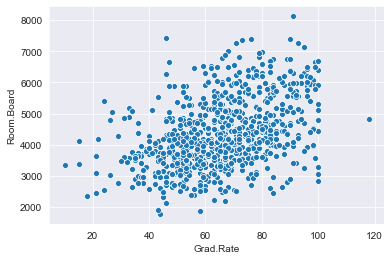

In [72]:
sns.scatterplot(x='Grad.Rate',y='Room.Board',data=df)

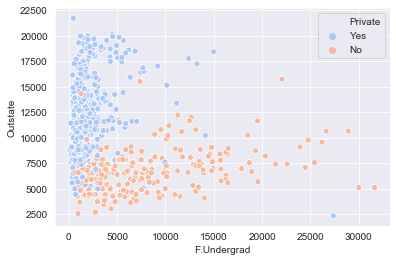

In [73]:
sns.scatterplot(x='F.Undergrad',y='Outstate',data=df,palette='coolwarm',hue='Private')

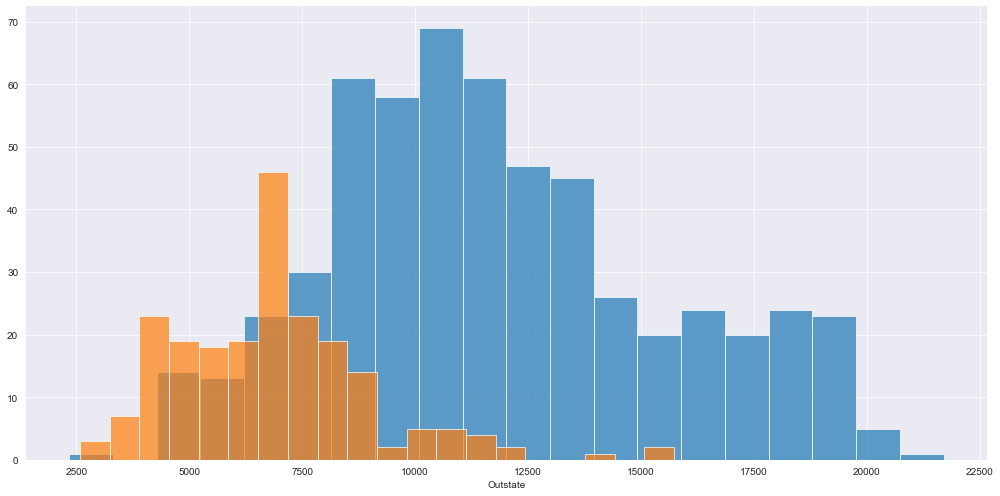

In [74]:
sns.set_style('darkgrid')
g=sns.FacetGrid(df,hue='Private',height=7,aspect=2)   # this represents a facet grid now plot on it
g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)


/Users/arungiri/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


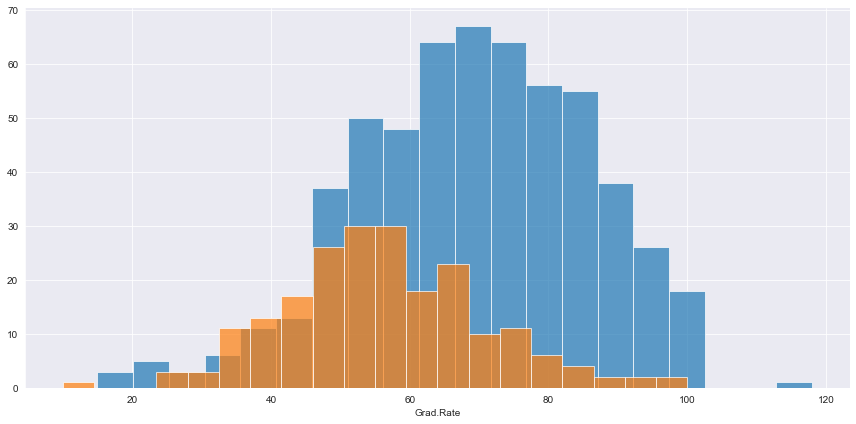

In [75]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

In [76]:
# we can see a college is having a grad rate of more than 100 % percent which is not possible so we will change it so 
# it does not affect our result

In [77]:
df[df['Grad.Rate']>100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [78]:
df.at[95,'Grad.Rate']=100

In [79]:
df.at[95,'Grad.Rate']

100

In [80]:
df[df['Grad.Rate']>100]  # we set that value as 100

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


/Users/arungiri/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


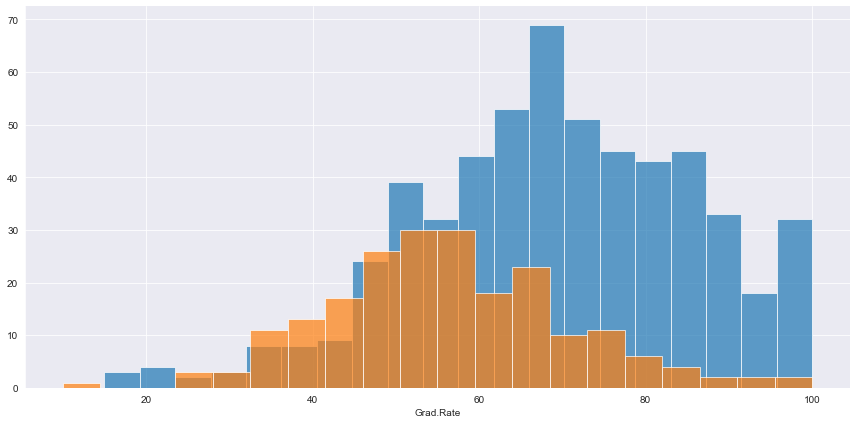

In [81]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

In [83]:
from sklearn.cluster import KMeans

In [91]:
Kmeans=KMeans(n_clusters=2);


In [92]:
Kmeans.fit(df.drop(['Private','Unnamed: 0'],axis=1))   # will make clusters of data

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [94]:
Kmeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

In [95]:
#Now evaluate our model
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [96]:
df['Cluster']=df['Private'].apply(converter)

In [102]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster'],Kmeans.labels_))
print(classification_report(df['Cluster'],Kmeans.labels_))

[[138  74]
 [531  34]]
              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



In [ ]:
#we can evaluate the model beacuse we have labeled data using that we marked the Cluster coloumn and then compared it with
# the Kmeans.labels_ provided by the algo